# Predicting heart disease using machine learning

This notebook looks into using various python-based machine learning and data science
libraries in an attempt to build a machine learning model capable of predicting whether or
not someone has heart disease by using medical attributes.

We're going to take the following steps:-
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> In a statement, Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

Data form kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation

> If we reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

 #### Create data dictionary  

##### Data dictionary of heart diseases data set, named as 'hd1'.

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
   -- Value 0: typical angina
   -- Value 1: atypical angina
   -- Value 2: non-anginal pain
   -- Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
   -- Value 0: normal
   -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    -- Value 0: upsloping
    -- Value 1: flat
    -- Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
    and the label
14. condition: 0 = no disease, 1 = disease

# Preparing the tools

we're going to use pandas, matplotlib, numpy for data analysis and data manipulation. And will also use machine learning tools.

In [57]:
# importing data manipulation and analysis tools.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing machine learning tools.

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# importing Evalution tools.

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,RocCurveDisplay
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
# loading the heart diseases uci .csv
hd1 = pd.read_csv('heart_cleveland_upload.csv')

In [3]:
# Getting familier with Data set.

In [4]:
hd1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
hd1.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [6]:
hd1.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  condition  
0        1   1     0 

In [7]:
hd1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [8]:
hd1.shape

(297, 14)

In [9]:
hd1.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [10]:
hd1.sex.value_counts()

1    201
0     96
Name: sex, dtype: int64

In [11]:
hd1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

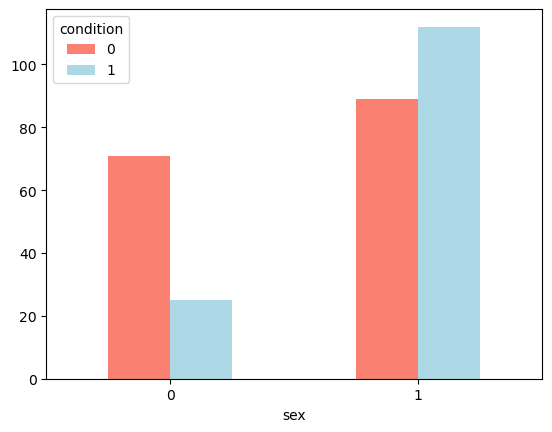

In [12]:
pd.crosstab(hd1['sex'],hd1['condition']).plot(kind='bar',color=['salmon','lightblue']);
plt.xticks(rotation=0);

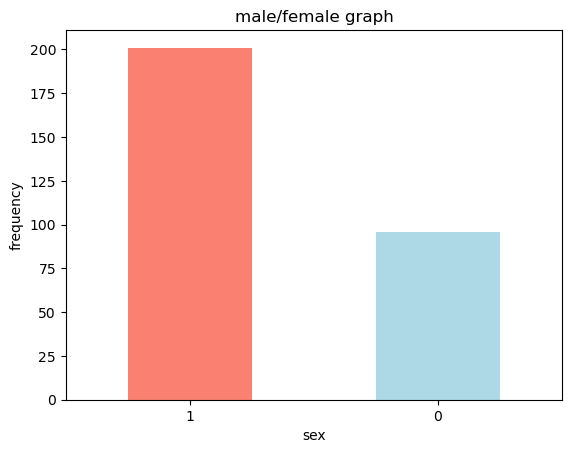

In [13]:
hd1.sex.value_counts().plot(kind='bar',xlabel='sex',ylabel='frequency',title='male/female graph',color=['salmon','lightblue'])
plt.xticks(rotation=0);

In [14]:
hd1.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

In [15]:
hd1.thalach.value_counts()

162    11
163     9
160     9
152     8
172     7
       ..
192     1
202     1
167     1
97      1
195     1
Name: thalach, Length: 91, dtype: int64

In [16]:
pd.crosstab(hd1['condition'],hd1['cp'])

cp,0,1,2,3
condition,,,,
0,16,40,65,39
1,7,9,18,103


##### Below u can see the all types of chest pain appropriately described and analyis the data.

* cp: chest pain type
   * Value 0: typical angina
   * Value 1: atypical angina
   * Value 2: non-anginal pain
   * Value 3: asymptomatic

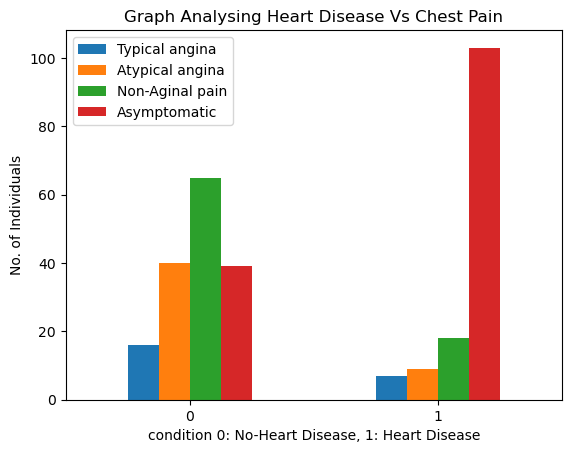

In [17]:
# visualizing the above data.

pd.crosstab(hd1['condition'],hd1['cp']).plot.bar()
plt.xticks(rotation=0)
plt.legend(['Typical angina','Atypical angina','Non-Aginal pain','Asymptomatic'])
plt.title('Graph Analysing Heart Disease Vs Chest Pain')
plt.xlabel('condition 0: No-Heart Disease, 1: Heart Disease')
plt.ylabel('No. of Individuals');

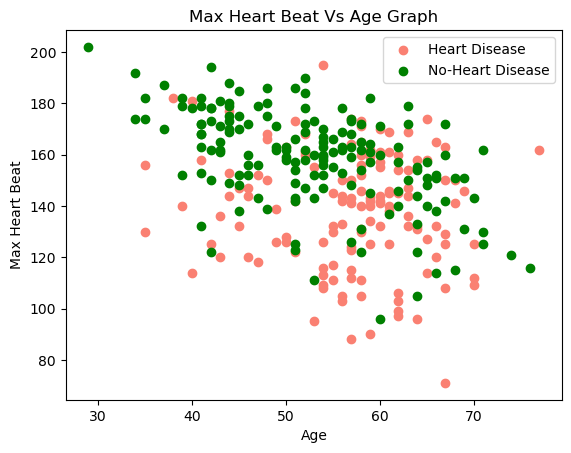

In [18]:
# Visualizing the Heart Beat in Scatter Plot.

plt.figure()
plt.scatter(hd1.age[hd1.condition==1] ,hd1.thalach[hd1.condition==1],color='salmon')
plt.scatter(hd1.age[hd1.condition==0] ,hd1.thalach[hd1.condition==0],color='green')
plt.title('Max Heart Beat Vs Age Graph')
plt.xlabel('Age')
plt.ylabel('Max Heart Beat')
plt.legend(['Heart Disease','No-Heart Disease']);

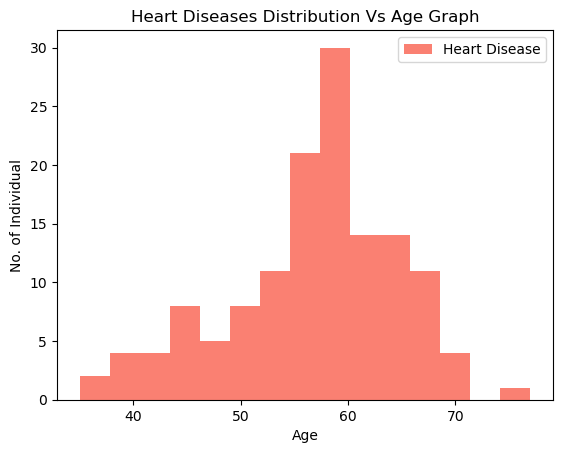

In [19]:
# Visualizing the spread of Individual with Heart Diseases Vs Age using the hist Graph.

hd1.age[hd1.condition==1].plot(kind='hist',bins=15,color='salmon')
plt.title('Heart Diseases Distribution Vs Age Graph')
plt.xlabel('Age')
plt.ylabel('No. of Individual')
plt.legend(['Heart Disease']);

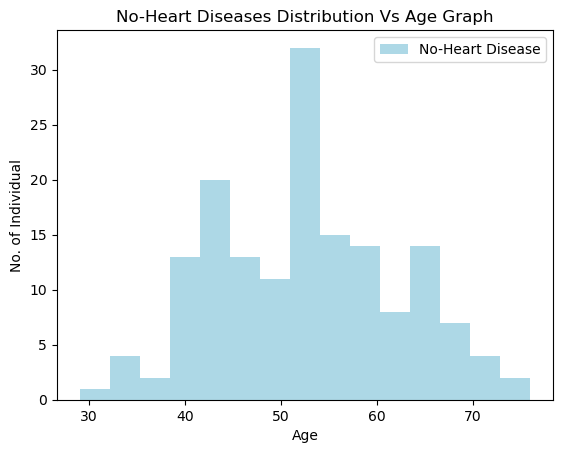

In [20]:
# Visualizing the spread of Individual with No-Heart Diseases Vs Age using the hist Graph.

hd1.age[hd1.condition==0].plot(kind='hist',bins=15,color='lightblue')
plt.title('No-Heart Diseases Distribution Vs Age Graph')
plt.xlabel('Age')
plt.ylabel('No. of Individual')
plt.legend(['No-Heart Disease']);

In [21]:
# As we have seen above their is the fair distribution of individual with Heart disease and No-Heart diseases. 

hd1.condition.value_counts()

0    160
1    137
Name: condition, dtype: int64

In [22]:
# Making the Correlation matrix of heart Diseases data set.

hd1.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052


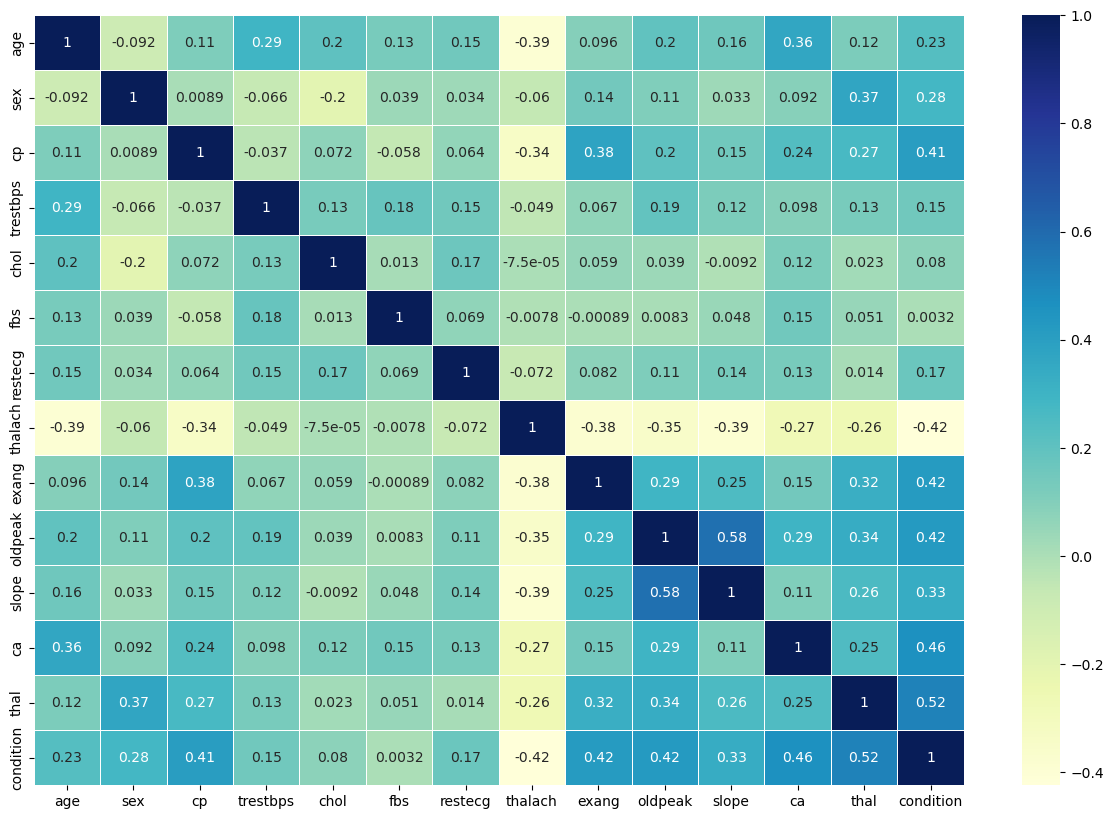

In [23]:
# visualizing the correlation matrix.

fig, ax = plt.subplots(figsize=(15,10))
ax= sns.heatmap(hd1.corr(),annot=True,linewidths=0.5,cmap='YlGnBu');

In [24]:
# Preparing the Data Set for Machine Learning Model.

X= hd1.drop('condition', axis=1)
y= hd1.condition

In [25]:
# Verifing the variable X, y.

X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0


In [26]:
y

0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: condition, Length: 297, dtype: int64

In [27]:
# Spliting the data set for train and test.

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size=0.2)

In [28]:
# Verifing the X_train data set.

X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
282,43,1,3,120,177,0,2,120,1,2.5,1,0,2
81,67,0,2,152,277,0,0,172,0,0.0,0,1,0
108,54,1,2,120,258,0,2,147,0,0.4,1,0,2
146,42,1,2,130,180,0,0,150,0,0.0,0,0,0
217,58,1,3,146,218,0,0,105,0,2.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,53,0,3,130,264,0,2,143,0,0.4,1,0,0
192,61,1,3,120,260,0,0,140,1,3.6,1,1,2
117,52,1,2,172,199,1,0,162,0,0.5,0,0,2
47,52,1,1,134,201,0,0,158,0,0.8,0,1,0


# 5. Modelling 
#### Creating a machine learning model for heart diseases
  1.  We are going to use three differnt machine learning models are given below:
        1. RandomForestClassifier
        2. LogisticRegression
        3. KNeighborsClassifier
        
        And will check score of these three models and will choose the best one.
        

In [29]:
def fit_score(models, X_train, X_test, y_train, y_test):
    '''
    This fuction fits the X_train, X_test, y_train, y_test into the models
    and produce scores of the models.
    models: Estimators to be used.
    X_train: Input training data for the model.
    X_test: Input testing data for the model.
    y_train: Output trainig data for the model.
    y_test: Output testing data for the model.
    '''
    # Creating Dictionary for saving the scores.
    model_score = {}
    
    # Applying random seed.
    np.random.seed(0)
    
    # Iterating the model and fitting the train and test value and getting the score of test from the models.
    for name, value in models.items():
        model = value()
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)
    
    # Returing the score from the models.    
    return model_score


models = {'RandomForest': RandomForestClassifier,
         'LogisticRegression': LogisticRegression,
         'KNN': KNeighborsClassifier}

In [30]:
model_score = fit_score(models, X_train, X_test, y_train, y_test)

model_score

/Users/surendar/Documents/heartdiseases/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForest': 0.75, 'LogisticRegression': 0.8333333333333334, 'KNN': 0.6}

In [31]:
model_compare = pd.DataFrame(model_score,index= ['Accuracy'])

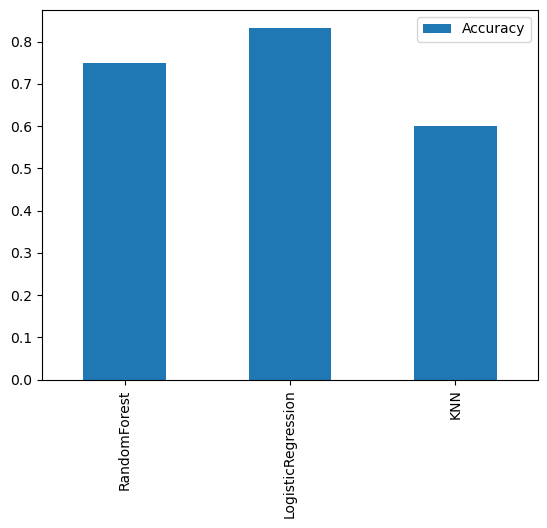

In [32]:
# Visualizing the model test data score.

model_compare.T.plot.bar();

# 6. Experimentation
####  Tuning the model using hyper-parameters

In [33]:
# Creating a list for saving test and train model score.

train_scores = []
test_scores = []

np.random.seed(0)

# Using the iter for tuning the KNN model hyper-parameters.

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_train_scores = knn.score(X_train, y_train)
    train_scores.append(knn_train_scores)
    knn_test_scores = knn.score(X_test,y_test)
    test_scores.append(knn_test_scores)
    

Maximum score for the model: 65.0%


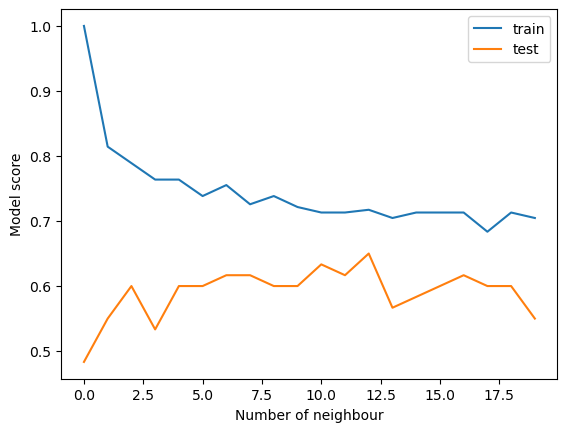

In [34]:
# Visualizing the above data.

plt.plot(train_scores)
plt.plot(test_scores)
plt.legend(['train','test'])
plt.xlabel('Number of neighbour')
plt.ylabel('Model score')
plt;

print(f'Maximum score for the model: {max(test_scores)* 100}%')

###  Tuning the hyper-parameters of random forest and logistic models 
  using RandomizedCV()

In [35]:
# Creating the hyper-parameter for logisticRegression

log_reg_grid = {'C': np.logspace(-4,4,20),
               'solver': ['liblinear']}

# Creating the hyper-parameter for RandomForestClassification

ran_cls_grid = {'n_estimators': np.arange(100, 1000, 50),
               'max_depth' : [None, 1, 3, 5],
               'min_samples_split': np.arange(2, 20, 2),
               'min_samples_leaf': np.arange(1, 20, 2)}


In [36]:
# Setup random seed
np.random.seed(0)

# Tuning with RandomizedSearchCV for logisticregression.

rs_lg = RandomizedSearchCV(LogisticRegression(),
                   param_distributions=log_reg_grid,
                  n_iter=10,
                  n_jobs=1,
                  cv=3,
                  verbose=True)

In [37]:
#fitting the data in randomizedsearchcv 
rs_lg.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [38]:
# getting the score
rs_lg.score(X_test, y_test)

0.8166666666666667

In [39]:
rs_lg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [40]:
# Setup random seed
np.random.seed(0)

# Tuning with RandomizedSearchCV for Randomforestclassifier.

rs_ran = RandomizedSearchCV(RandomForestClassifier(),
                   param_distributions=ran_cls_grid,
                  n_iter=10,
                  n_jobs=1,
                  cv=3,
                  verbose=True)

In [41]:
rs_ran.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [None, 1, 3, 5],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950])},
                   verbose=True)

In [42]:
rs_ran.best_params_

{'n_estimators': 950,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [43]:
rs_ran.score(X_test, y_test)

0.75

In [44]:
# Setup random seed
np.random.seed(0)

# Tuning with GridSearchCV for logisticregression.

gs_lg = GridSearchCV(LogisticRegression(),
                  param_grid=log_reg_grid,
                  n_jobs=1,
                  cv=3,
                  verbose=True)

In [45]:
gs_lg.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [46]:
gs_lg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [47]:
gs_lg.score(X_test, y_test)

0.8166666666666667

In [48]:
# Setup random seed
np.random.seed(0)

# Tuning with GridsearchCV for Randomforestclassifier.

ran_cls_grid_gs = {'n_estimators': np.arange(100, 200, 50),
               'max_depth' : [ 1, 3],
               'min_samples_split': np.arange(2, 10, 2),
               'min_samples_leaf': np.arange(1, 10, 2)}


gs_ran = GridSearchCV(RandomForestClassifier(),
                  param_grid=ran_cls_grid_gs,
                  n_jobs=1,
                  cv=3,
                  verbose=True)

In [49]:
gs_ran.fit(X_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [1, 3],
                         'min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([100, 150])},
             verbose=True)

In [50]:
gs_ran.best_params_

{'max_depth': 3,
 'min_samples_leaf': 7,
 'min_samples_split': 6,
 'n_estimators': 150}

In [51]:
gs_ran.score(X_test, y_test)

0.7833333333333333

#### Evaluating the model 
using:
     
* ROC curve and Auc score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [52]:
# Predicting the X_test using Grid search logistic regression model.

y_predict = gs_lg.predict(X_test)

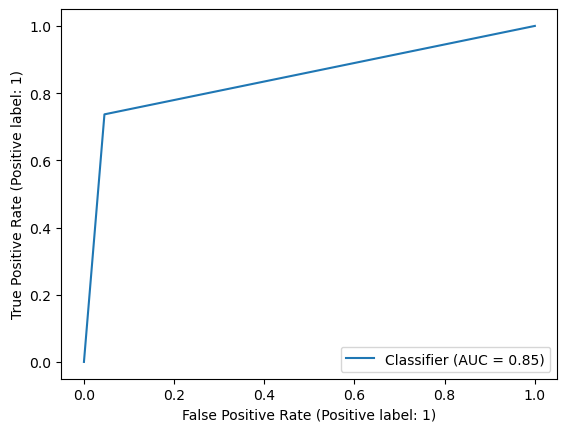

In [53]:
# producing the roc and auc score.

RocCurveDisplay.from_predictions(y_test, y_predict);

In [54]:
# Creating confusion matrix

confusion_matrix(y_test, y_predict)

array([[21,  1],
       [10, 28]])

Text(50.722222222222214, 0.5, 'True label')

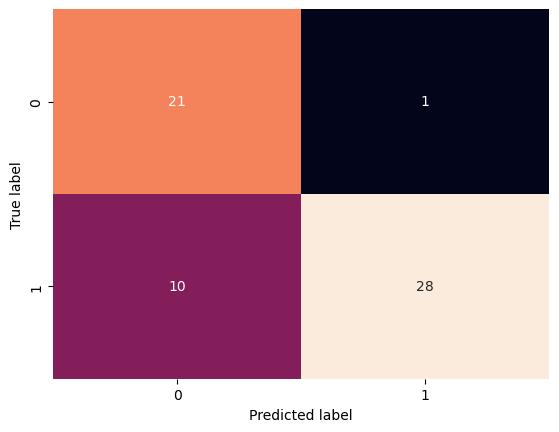

In [55]:
#Visualizing the confusion matrix.

fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_test, y_predict),
                annot= True,
                cbar=False)

plt.xlabel("Predicted label")
plt.ylabel("True label")

In [56]:
# Printing the classification report.

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.68      0.95      0.79        22
           1       0.97      0.74      0.84        38

    accuracy                           0.82        60
   macro avg       0.82      0.85      0.81        60
weighted avg       0.86      0.82      0.82        60



In [58]:
# using cross value score.

gs_lg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [59]:
cls = LogisticRegression(C = 0.08858667904100823, solver= 'liblinear')

In [60]:
cls_accuracy = cross_val_score(cls,
                X,
                y,
               scoring='accuracy',
                cv=5)

In [63]:
cls_accuracy = np.mean(cls_accuracy)

In [64]:
cls_precision = cross_val_score(cls,
                X,
                y,
               scoring='precision',
                cv=5)

cls_precision = np.mean(cls_precision)

In [65]:
cls_recall = cross_val_score(cls,
                X,
                y,
               scoring='recall',
                cv=5)

cls_recall = np.mean(cls_recall)

In [66]:
cls_f1 = cross_val_score(cls,
                X,
                y,
               scoring='f1',
                cv=5)

cls_f1 = np.mean(cls_f1)

In [68]:
# Putting all the above value in panda DataFrame.

cls_pd = pd.DataFrame({'accuracy': cls_accuracy, 'precision': cls_precision, 'recall': cls_recall, 'f1': cls_f1}, index=['average'])

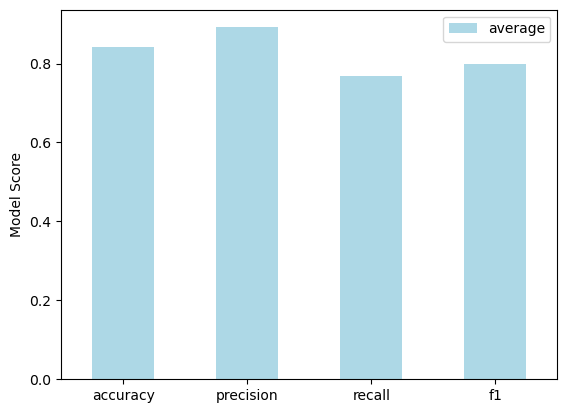

In [76]:
# Visualizing all the score produced by cross_val_score.

cls_pd.T.plot(kind= 'bar', color= 'lightblue')
plt.xticks(rotation=0)
plt.ylabel('Model Score');

# Important Features

In [77]:
# knowing the features used in order to predict the heart disease.

np.random.seed(0)

cls.fit(X_train, y_train)

LogisticRegression(C=0.08858667904100823, solver='liblinear')

In [78]:
cls.coef_

array([[-0.00904551,  0.35309482,  0.38212092,  0.01069669,  0.00261365,
        -0.09791289,  0.1673135 , -0.03029071,  0.32273891,  0.3105817 ,
         0.09145698,  0.61712517,  0.65209485]])

In [92]:
cls_coef_features = dict(zip(X.columns, cls.coef_[0]))

In [93]:
cls_coef_features

{'age': -0.009045511173202356,
 'sex': 0.3530948249982452,
 'cp': 0.3821209220355851,
 'trestbps': 0.010696685794735648,
 'chol': 0.0026136500941514444,
 'fbs': -0.09791289057979409,
 'restecg': 0.16731349699495496,
 'thalach': -0.030290706413122728,
 'exang': 0.32273891219414563,
 'oldpeak': 0.3105816992075769,
 'slope': 0.0914569845241477,
 'ca': 0.6171251682318366,
 'thal': 0.6520948539217853}

In [94]:
cls_coef_df = pd.DataFrame(cls_coef_features,index= ['Important Features'])

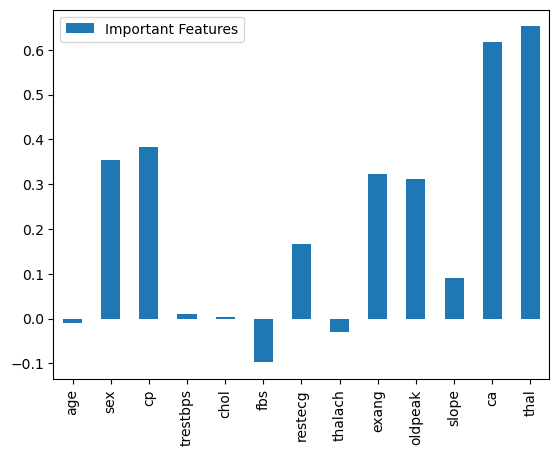

In [96]:
cls_coef_df.T.plot(kind='bar');